'''

@Author: Jayesh Patil 

@Date: 12-11-24 

@Title: Multiple Linear Regression 

'''

Problem :-Build a predictive linear regression model for given dataset, given temperature,
humidity, wind speed , wind bearing, visibility, pressure predict apparent
temperature

Importing libraries

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

Loading Data

In [13]:
df = pd.read_csv('weatherHistory.csv')
df.sample(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
71762,2014-12-15 02:00:00.000 +0100,Mostly Cloudy,rain,6.322222,4.138889,0.83,10.5616,159.0,6.7942,0.0,1023.28,Mostly cloudy throughout the day.
94426,2016-11-15 14:00:00.000 +0100,Mostly Cloudy,rain,8.677778,6.566667,0.76,13.0571,177.0,9.8854,0.0,1018.68,Partly cloudy throughout the day.
23289,2008-03-05 10:00:00.000 +0100,Overcast,rain,4.955556,0.683333,0.58,22.9908,39.0,9.9820,0.0,1014.72,Mostly cloudy throughout the day.
6303,2006-05-27 16:00:00.000 +0200,Breezy and Partly Cloudy,rain,22.244444,22.244444,0.55,34.4057,329.0,11.2056,0.0,1019.13,Mostly cloudy until night and breezy starting ...
59113,2012-05-06 02:00:00.000 +0200,Partly Cloudy,rain,14.650000,14.650000,0.60,11.5437,239.0,15.1501,0.0,1010.64,Partly cloudy throughout the day.


Analysing Dataset

In [14]:
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X = df[features]
y = df['Apparent Temperature (C)']

In [15]:
print(X.describe())
print("Shape of X:",X.shape)
print(X.info())


       Temperature (C)      Humidity  Wind Speed (km/h)  \
count     96453.000000  96453.000000       96453.000000   
mean         11.932678      0.734899          10.810640   
std           9.551546      0.195473           6.913571   
min         -21.822222      0.000000           0.000000   
25%           4.688889      0.600000           5.828200   
50%          12.000000      0.780000           9.965900   
75%          18.838889      0.890000          14.135800   
max          39.905556      1.000000          63.852600   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
count            96453.000000     96453.000000          96453.000000  
mean               187.509232        10.347325           1003.235956  
std                107.383428         4.192123            116.969906  
min                  0.000000         0.000000              0.000000  
25%                116.000000         8.339800           1011.900000  
50%                180.000000        10.04

In [16]:
print(y.describe())
print("Shape of y:",y.shape)
print(y.info())

count    96453.000000
mean        10.855029
std         10.696847
min        -27.716667
25%          2.311111
50%         12.000000
75%         18.838889
max         39.344444
Name: Apparent Temperature (C), dtype: float64
Shape of y: (96453,)
<class 'pandas.core.series.Series'>
RangeIndex: 96453 entries, 0 to 96452
Series name: Apparent Temperature (C)
Non-Null Count  Dtype  
--------------  -----  
96453 non-null  float64
dtypes: float64(1)
memory usage: 753.7 KB
None


Handling null values

In [17]:
print(X.isnull().sum())
print(y.isnull().sum())

Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64
0


In [18]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Check outliers

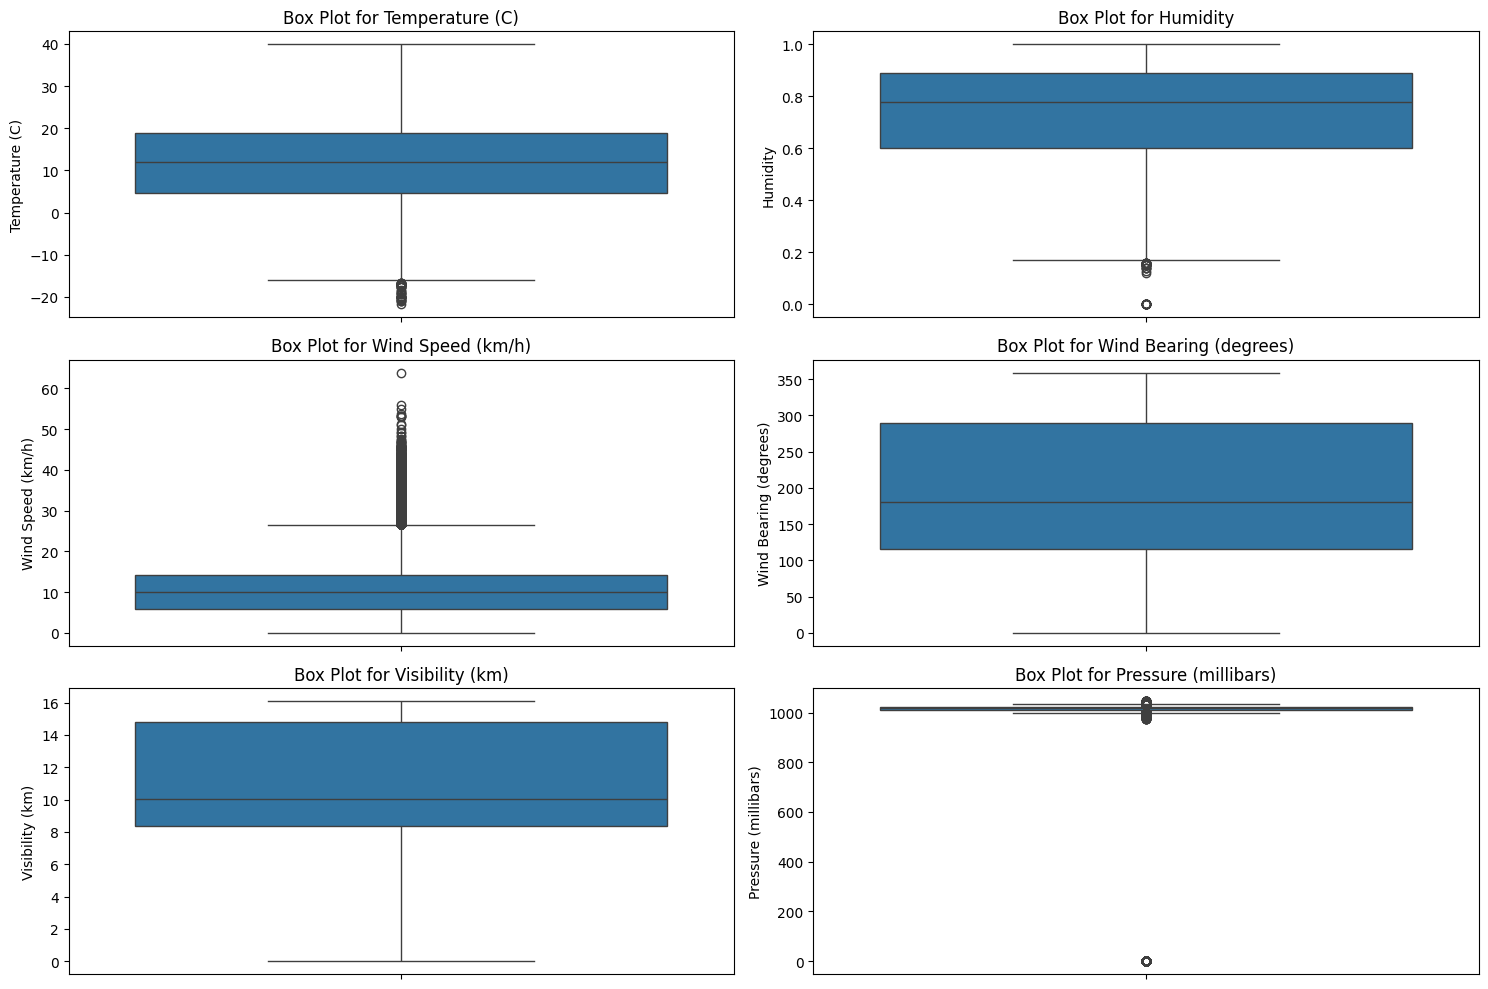

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each feature
    sns.boxplot(y=df[feature])  # Use each feature individually
    plt.title(f'Box Plot for {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Remove outliers

In [68]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(X))
threshold = 2
X_no_outliers = X[(z_scores < threshold).all(axis=1)]
y_no_outliers = y[X_no_outliers.index]

# Display the number of records removed
print(f'Removed outliers, remaining records: {X_no_outliers.shape[0]}')

# Splitting the cleaned dataset into training and testing sets
X_clean = X_no_outliers.values
y_clean = y_no_outliers.values

Removed outliers, remaining records: 80287


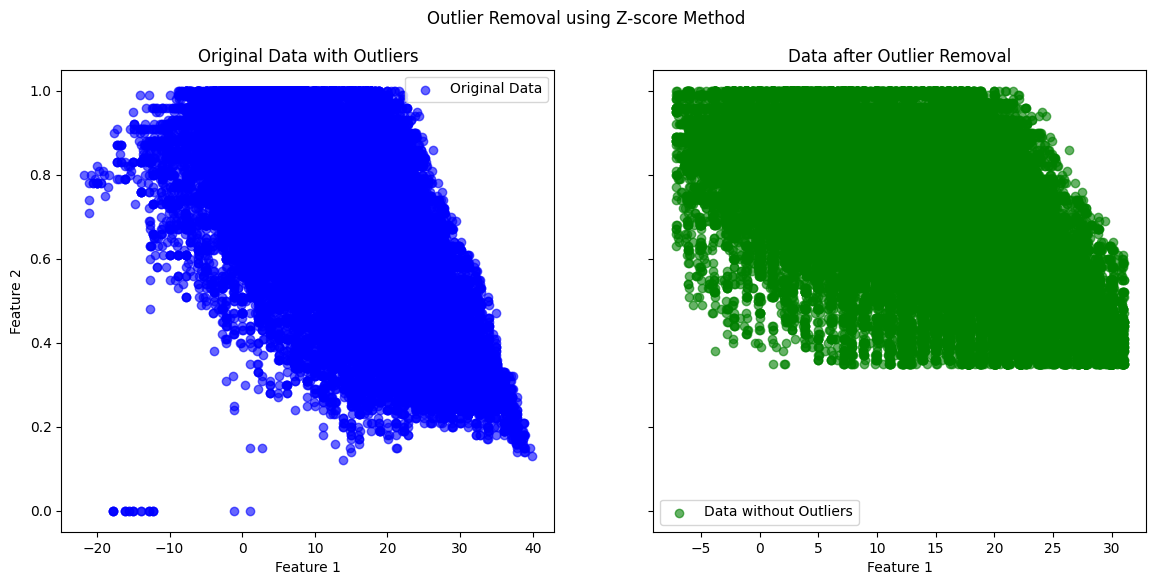

In [70]:
# Plot original data and data without outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Outlier Removal using Z-score Method")

# Original data scatter plot
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label="Original Data", alpha=0.6)
axes[0].set_title("Original Data with Outliers")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].legend()

# Data after outlier removal scatter plot
axes[1].scatter(X_clean[:, 0], X_clean[:, 1], c='green', label="Data without Outliers", alpha=0.6)
axes[1].set_title("Data after Outlier Removal")
axes[1].set_xlabel("Feature 1")
axes[1].legend()

plt.show()

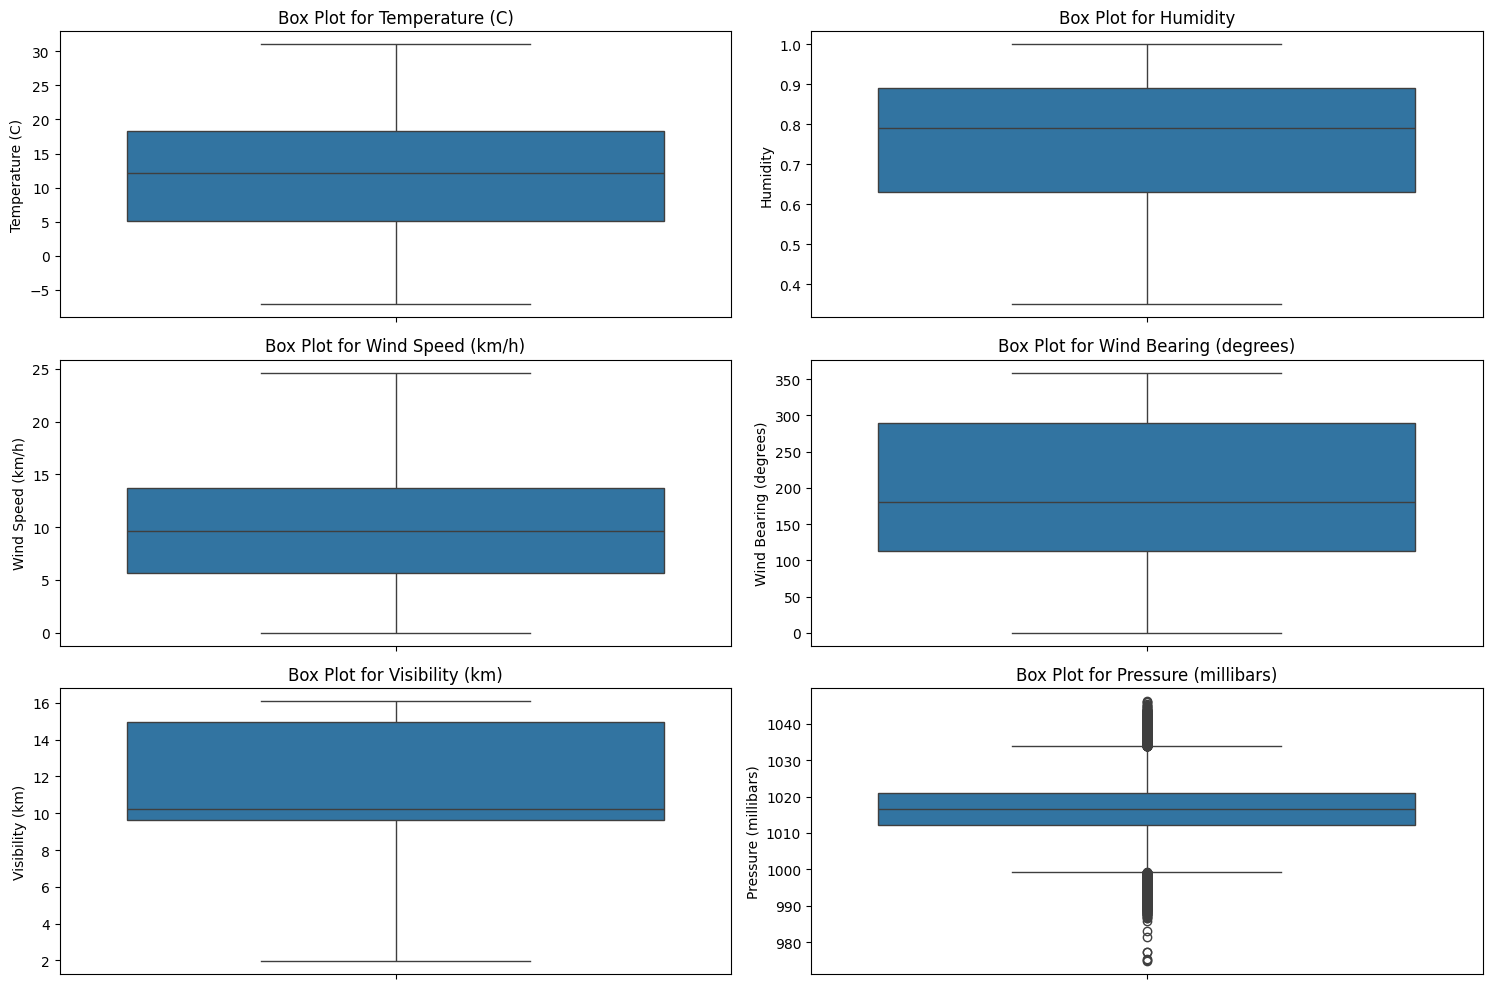

In [59]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Creating a subplot for each feature
    sns.boxplot(y=data_no_outliers[feature])  # Use each feature individually
    plt.title(f'Box Plot for {feature}')
    plt.ylabel(feature)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Correlation 

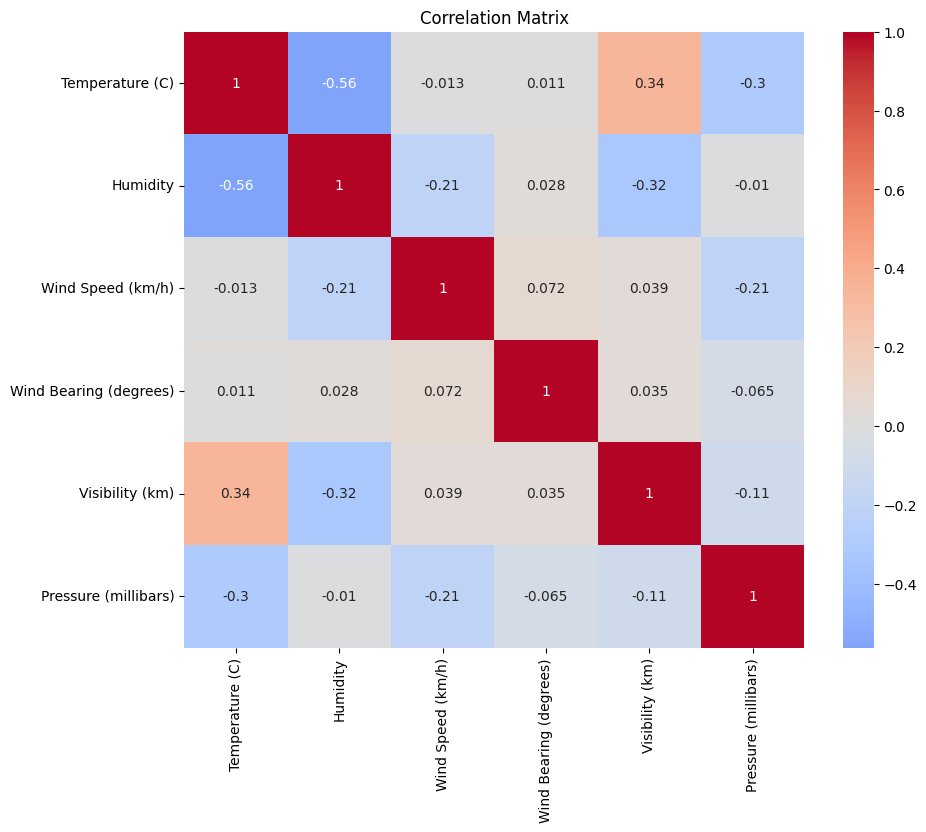

In [60]:
# Convert the cleaned data back to a DataFrame
X_clean = pd.DataFrame(X_clean, columns=features)

# Calculate the correlation matrix
correlation_matrix = X_clean.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

Spliting Dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_test_scaled


array([[-0.90796471,  0.58232851,  0.39460734, -0.2557565 , -1.31500951,
         0.39503483],
       [-0.22469857,  0.11049775, -1.21875816,  0.86091326,  1.33034404,
        -0.09352472],
       [ 1.19817889, -1.71784642, -0.43238757, -1.54923231, -0.23615406,
         0.83942325],
       ...,
       [-0.94164229,  1.2310958 ,  0.77183309,  0.96327465, -2.22987892,
        -2.38373126],
       [ 0.65869007, -1.71784642,  0.22050315, -0.97228627, -0.13689936,
        -0.34650487],
       [ 0.99481816, -1.48193104,  0.64996016, -0.64659092,  1.14909632,
        -0.37862933]])

Model Selection

In [63]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

Model Performance

In [64]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.8271385877912922
R^2 Score: 0.9912160190865391


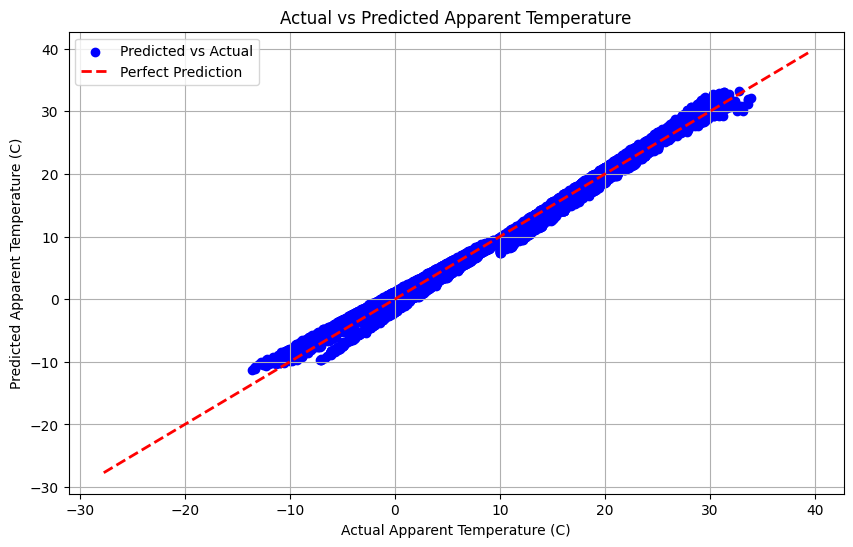

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Apparent Temperature')
plt.xlabel('Actual Apparent Temperature (C)')
plt.ylabel('Predicted Apparent Temperature (C)')
plt.legend()
plt.grid()
plt.show()